In [1]:
cd ..

/Users/annaschaar/phd/code/spatial-tools


### 0. Imports

In [24]:
import scanpy as sc
from spatial_tools import read_seqfish
from spatial_tools.graph import cluster_centrality_scores, cluster_interactions, plot_cluster_centrality_scores, plot_cluster_interactions


%load_ext autoreload
%autoreload 2
#%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A. seqFISH

In [6]:
BASE_PATH = '/Users/annaschaar/phd/datasets/2019_Eng_seqFISH/seqFISH-PLUS-master'

### 1. Build spatial graphs

In [8]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

/Users/annaschaar/.conda/envs/spatial-toolsenv/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

In [9]:
adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()
# use number of neighbors
spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

/Users/annaschaar/.conda/envs/spatial-toolsenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


### 2. Calculate centrality scores

In [13]:
cluster_centrality_scores(adata_svz_5, clusters_key='louvain', connectivity_key='spatial_connectivity')

Using saved networkx graph stored under .uns in AnnData object.


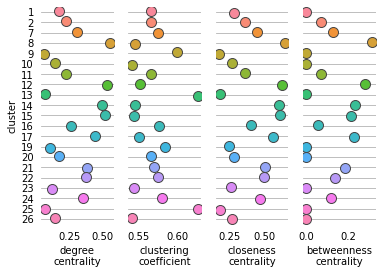

In [25]:
plot_cluster_centrality_scores(adata_svz_5)

### 3. Get interactions od clusters

In [29]:
cluster_interactions(adata_svz_5, clusters_key='louvain', normalized=True)

Using saved networkx graph stored under .uns in AnnData object.


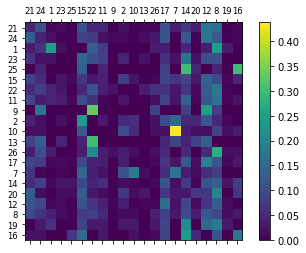

In [30]:
plot_cluster_interactions(adata_svz_5)

# B. Visium

In [9]:
dataset_name = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
dataset_folder = ""

In [10]:
adata = sc.read_visium(dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_leiden.py:111: FutureWarning: T

In [13]:
spatial_connectivity(adata, obsm='X_spatial', n_rings=3)

C:\Users\anna-\Anaconda3\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_louvain.py:107: FutureWarning: 

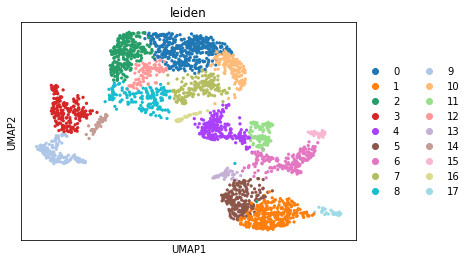

In [14]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='leiden')

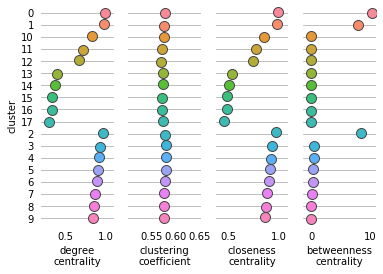

In [15]:
cluster_centrality_scores(adata,'spatial_connectivity','leiden')

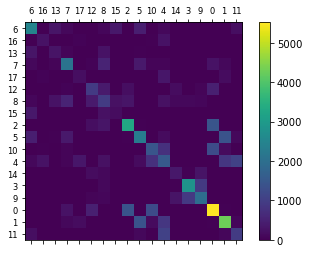

In [16]:
cluster_interactions(adata,'leiden')